In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!git clone https://github.com/ruili4UCSD/CSE151A_WIN24_GROUP.git
from google.colab import files
# Make directory named kaggle, copy kaggle.json file there, and change the permissions of the file.
! mkdir ~/.kaggle
! cp ./CSE151A_WIN24_GROUP/data/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Download and unzip sign-language-mnist dataset into '/usr/local'
! kaggle datasets download -d gzipchrist/leetcode-problem-dataset --path 'CSE151A_WIN24_GROUP/data/dataset/'
# ! unzip 'CSE151A_WIN24_GROUP/data/dataset/leetcode-problem-dataset.zip' -d "CSE151A_WIN24_GROUP/data/dataset/"

fatal: destination path 'CSE151A_WIN24_GROUP' already exists and is not an empty directory.
mkdir: cannot create directory ‘/root/.kaggle’: File exists
leetcode-problem-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# Data Set Exploration


## Import Dataset

In [13]:
raw_data = pd.read_csv("CSE151A_WIN24_GROUP/data/dataset/leetcode_dataset - lc.csv")

In [26]:
# print("Dataset head: \n", raw_data.head())
print("\nDataset info: \n", raw_data.info())
print("\nDataset null data sum: \n", raw_data.isnull().sum())
print("\nData example: ")
raw_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1825 non-null   int64  
 1   title              1825 non-null   object 
 2   description        1825 non-null   object 
 3   is_premium         1825 non-null   int64  
 4   difficulty         1825 non-null   int64  
 5   solution_link      987 non-null    object 
 6   acceptance_rate    1825 non-null   float64
 7   frequency          1825 non-null   float64
 8   url                1825 non-null   object 
 9   discuss_count      1825 non-null   int64  
 10  accepted           1825 non-null   object 
 11  submissions        1825 non-null   object 
 12  companies          1749 non-null   object 
 13  related_topics     1571 non-null   object 
 14  likes              1825 non-null   int64  
 15  dislikes           1825 non-null   int64  
 16  rating             1825 

id                                           title  \
0   1                                         Two Sum   
1   2                                 Add Two Numbers   
2   3  Longest Substring Without Repeating Characters   
3   4                     Median of Two Sorted Arrays   
4   5                   Longest Palindromic Substring   

                                         description  is_premium  difficulty  \
0  Given an array of integers `nums` and an integ...           0           0   
1  You are given two non-empty linked lists repre...           0           1   
2  Given a string `s`, find the length of the lon...           0           1   
3  Given two sorted arrays `nums1` and `nums2` of...           0           2   
4  Given a string `s`, return the longest palindr...           0           1   

                                       solution_link  acceptance_rate  \
0                                  /articles/two-sum             46.7   
1                          /articles/add-two-numbers             35.7   
2  /articles/longest-substring-without-repeating-...             31.5   
3              /articles/median-of-two-sorted-arrays             31.4   
4            /articles/longest-palindromic-substring             30.6   

   frequency                                                url  \
0      100.0              https://leetcode.com/problems/two-sum   
1       93.1      https://leetcode.com/problems/add-two-numbers   
2       90.9  https://leetcode.com/problems/longest-substrin...   
3       86.2  https://leetcode.com/problems/median-of-two-so...   
4       84.7  https://leetcode.com/problems/longest-palindro...   

   discuss_count accepted submissions  \
0            999     4.1M        8.7M   
1            999     1.9M        5.2M   
2            999     2.1M        6.7M   
3            999   904.7K        2.9M   
4            999     1.3M        4.1M   

                                           companies  \
0  Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...   
1  Bloomberg,Microsoft,Amazon,Google,Facebook,App...   
2  Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...   
3  Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...   
4  Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...   

                                  related_topics  likes  dislikes  rating  \
0                               Array,Hash Table  20217       712      97   
1                     Linked List,Math,Recursion  11350      2704      81   
2  Hash Table,Two Pointers,String,Sliding Window  13810       714      95   
3         Array,Binary Search,Divide and Conquer   9665      1486      87   
4                     String,Dynamic Programming  10271       670      94   

   asked_by_faang                                  similar_questions  
0               1  [3Sum, /problems/3sum/, Medium], [4Sum, /probl...  
1               1  [Multiply Strings, /problems/multiply-strings/...  
2               1  [Longest Substring with At Most Two Distinct C...  
3               1                                                NaN  
4               1  [Shortest Palindrome, /problems/shortest-palin...

## Dataset Attribute Descriptions

The dataset we have chosen to work with is related to Leetcode, which is one of the largest interview coding prep platforms on the internet, with a huge catalog of coding problems ranked easy, medium, and hard.

The total number of observations that have been gathered for this dataset is 1825. We have considered that this is an appropriate number of observations, with enough data to perform a correct analysis and modeling but not so many as to need to subsample the dataset.

For each of these observations we have 19 distinct features. However, we have decided to drop 6 of the columns for the purpose of our analysis, since they are not relevant to our project.

Our target is difficulty. That is, with this project our aim is to predict whether the problem is considered easy, medium or hard.


| Column Name         | Data Type | # of Null | Description |
|---------------------|-----------|-----------|-------------|
| id                  | int64     | 0         | Unique problem id. |
| title               | String    | 0         | name of the problem. |
| description         | String    | 0         | problem description. |
| is_premium          | int64     | 0         | whether the question requires a premium account). This has been encoded as a number where the only possible values are 0 or 1, and 1 implies that the question does require a premium account. |
| difficulty          | String    | 0         | The level of difficulty of the entry (e.g., Easy, Medium, Hard). |
| solution_link       | String    | 838       | link to the solution for the problem. |
| acceptance_rate     | float64   | 0         | how often the answer submitted is correct). This is a float value indicating the percentage of acceptance, ranging from 13.9 to 95.6 in the case of our dataset but with a possible range of values between 0 and 100. |
| frequency           | float64   | 0         | how often the problem is attempted). This is also in the form of percentage. |
| url                 | String    | 0         | url to the problem. |
| discuss_count       | int64     | 0         | (how many comments are submitted by users). For this feature we have observed that there is a maximum count of 999, which means that there could be problems with that value that could go well over this limit or stay close to it. |
| accepted            | String    | 0         | how many times the answer was accepted). This has been encoded in the dataset as a string, where the value is encoded either as valueK, indicating that the value is in the thousands, or valueM, placing the value in the millions. However, for our project, we will convert this value to a number. |
| submissions         | String    | 0         | how many times the answer was submitted). This feature has the same characteristics as the previous feature, so we will perform the same modification. |
| companies           | String    | 76        | which companies were tagged as having asked this specific problem. |
| related_topics      | String    | 254       | (topics related to the current problem). This feature is given as a string of the different topics that the problem is associated with. However, as will be observed in the analysis, we have decided to use one-hot encoding in order to be able to work with this feature. It is also important to note that there is a 14% of null values, meaning that 14% of our observations don’t have any value for this feature. |
| likes               | int64     | 0         | how many likes the problem got). Integer value ranging from 2 to 20,200. |
| dislikes            | int64     | 0         | how many dislikes the problem got). Integer value ranging from 0 to 8900. |
| rating              | int64     | 0         | This feature is a combination of the previous 2 features. It is computed as likes/(likes+dislikes). Therefore, this is encoded in the form of percentage, ranging in the case of our dataset between 7 and 100. |
| asked_by_faang      | int64     | 0         | whether or not the question was asked by facebook, apple, amazon, google, or netflix. |
| similar_questions   | String    | 1080      | A list of similar entries, possibly including titles, links, and difficulty levels. |

##  Data Scales and Data Distributions

- Analyze the distribution of topics and difficulty levels, and the relationship between the two.
- Explore the correlation between problem difficulty and other factors such as acceptence rate, frequency, submissions, related topics, and the like-to-dislike ratio.

In [18]:
raw_data.describe()

id   is_premium   difficulty  acceptance_rate    frequency  \
count  1825.000000  1825.000000  1825.000000      1825.000000  1825.000000   
mean    913.000000     0.218082     0.949589        53.139616    21.113041   
std     526.976438     0.413057     0.685598        14.778411    22.364741   
min       1.000000     0.000000     0.000000        13.900000     0.000000   
25%     457.000000     0.000000     0.000000        42.400000     3.100000   
50%     913.000000     0.000000     1.000000        51.600000    13.500000   
75%    1369.000000     0.000000     1.000000        62.800000    31.800000   
max    1825.000000     1.000000     2.000000        95.600000   100.000000   

       discuss_count         likes     dislikes       rating  asked_by_faang  
count    1825.000000   1825.000000  1825.000000  1825.000000     1825.000000  
mean      421.435068   1050.534795   279.010959    77.391233        0.671233  
std       330.583617   1512.674013   608.489206    23.317515        0.469894  
min         9.000000      2.000000     0.000000     7.000000        0.000000  
25%       150.000000    217.000000    32.000000    67.000000        0.000000  
50%       292.000000    516.000000    92.000000    88.000000        1.000000  
75%       663.000000   1200.000000   239.000000    95.000000        1.000000  
max       999.000000  20217.000000  8900.000000   100.000000        1.000000

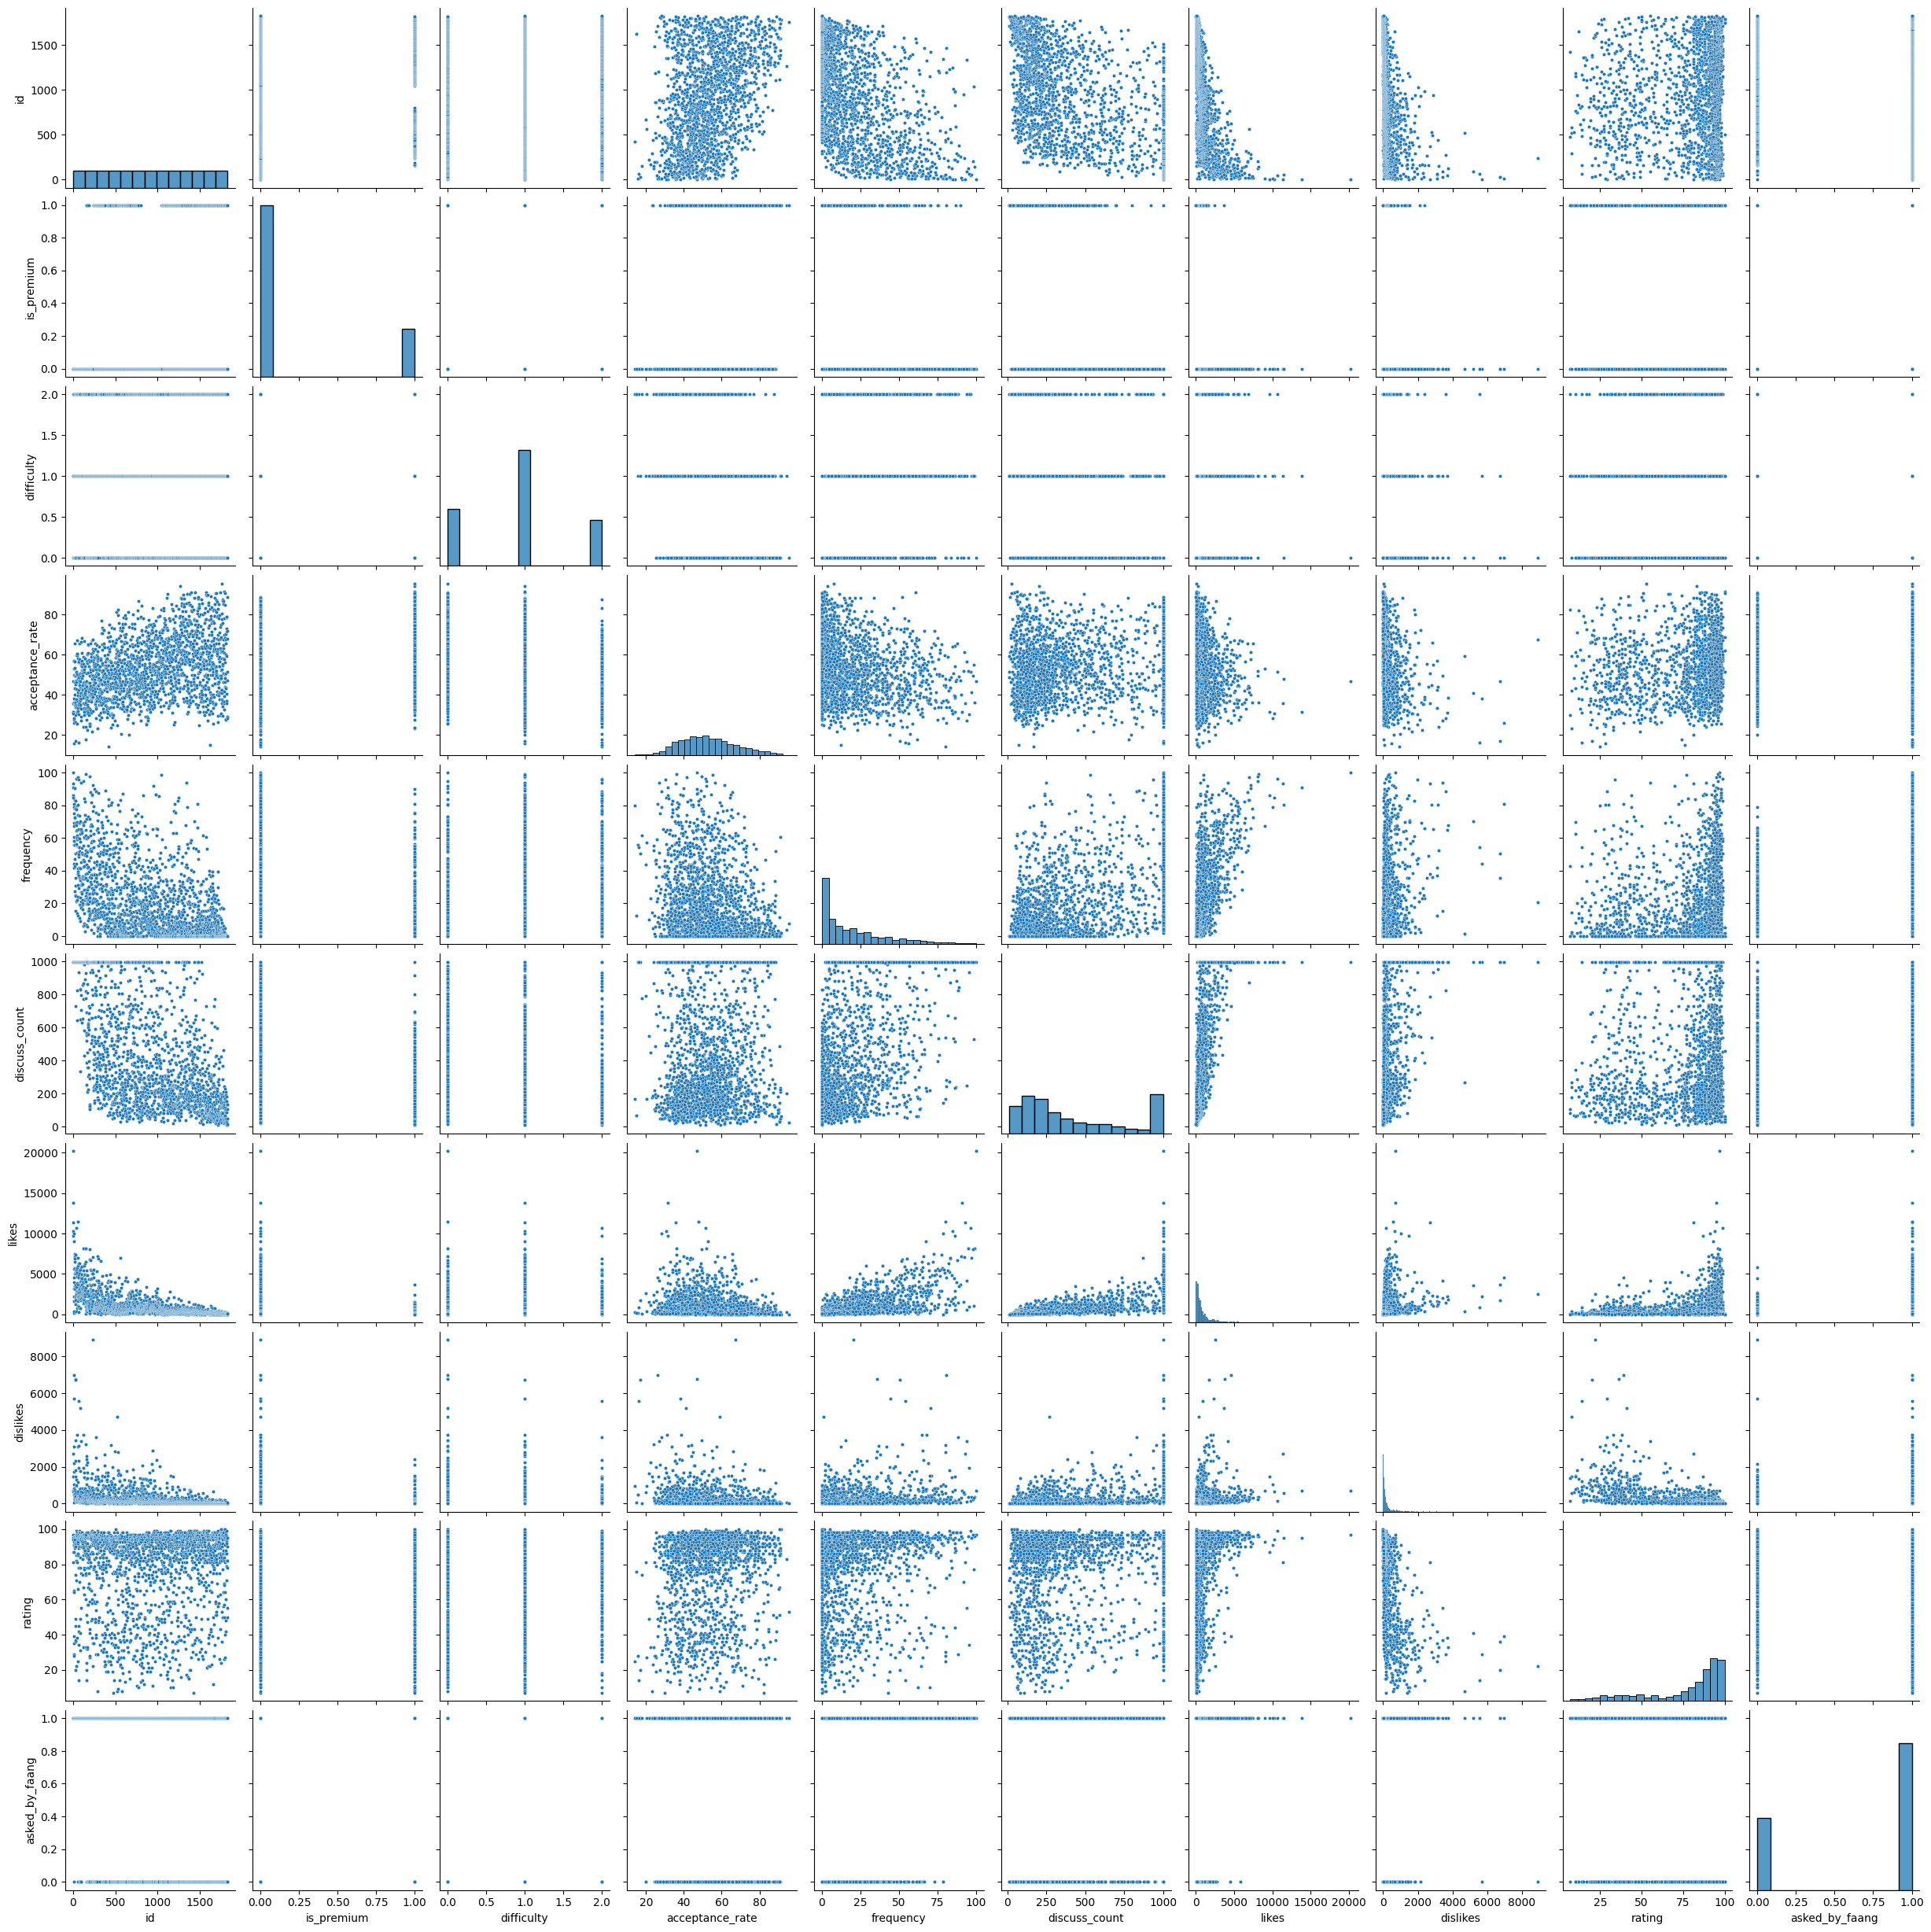

In [22]:
data_example = raw_data
difficulty_mapping = {'Easy': 0, 'Medium': 1, 'Hard': 2}
data_example['difficulty'] = data_example['difficulty'].replace(difficulty_mapping)
sns.pairplot(data_example, height=2.5, plot_kws={'s': 10})

### Count of Problems by Topic
In this section, we calculate and visualize the number of problems associated with each unique topic.


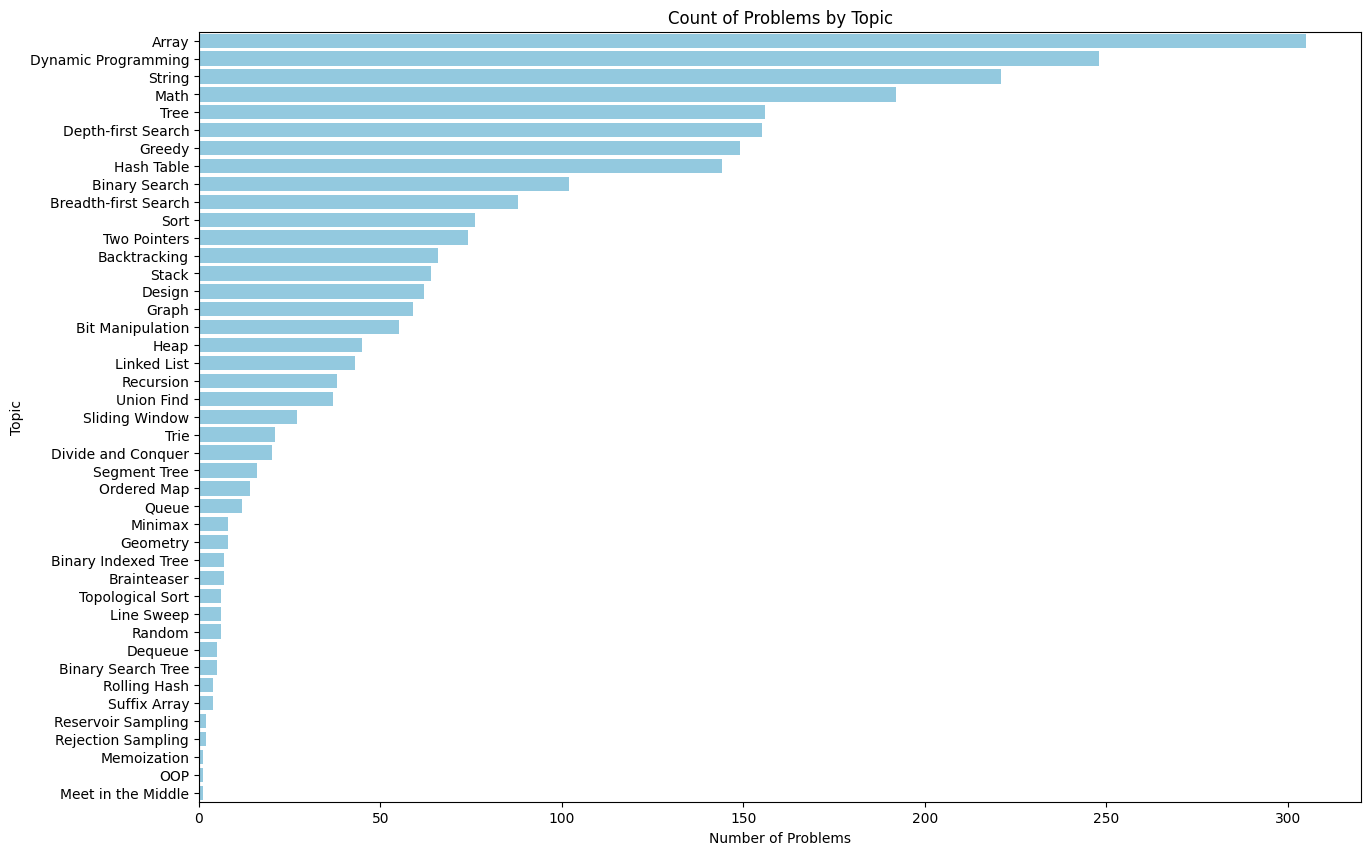

In [42]:
related_topics = data_example['related_topics'].str.get_dummies(sep=",").columns.to_list()
data_example = pd.concat([data_example.drop(columns=['related_topics']), data_example['related_topics'].str.get_dummies(sep=",")], axis=1)
unique_topics = [
    'Array', 'Backtracking', 'Binary Indexed Tree', 'Binary Search', 'Binary Search Tree',
    'Bit Manipulation', 'Brainteaser', 'Breadth-first Search', 'Depth-first Search', 'Dequeue',
    'Design', 'Divide and Conquer', 'Dynamic Programming', 'Geometry', 'Graph', 'Greedy', 'Hash Table',
    'Heap', 'Line Sweep', 'Linked List', 'Math', 'Meet in the Middle', 'Memoization', 'Minimax', 'OOP',
    'Ordered Map', 'Queue', 'Random', 'Recursion', 'Rejection Sampling', 'Reservoir Sampling', 'Rolling Hash',
    'Segment Tree', 'Sliding Window', 'Sort', 'Stack', 'String', 'Suffix Array', 'Topological Sort',
    'Tree', 'Trie', 'Two Pointers', 'Union Find'
]

topic_counts = data_example[unique_topics].sum().reset_index()
topic_counts.columns = ['Topic', 'Count']

topic_counts_sorted = topic_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x='Count', y='Topic', data=topic_counts_sorted, color='skyblue')

plt.title('Count of Problems by Topic')
plt.xlabel('Number of Problems')
plt.ylabel('Topic')
plt.show()

### Distribution of Problem Difficulty Levels
Next, we display the distribution of problems across different difficulty levels (Easy, Medium, Hard).

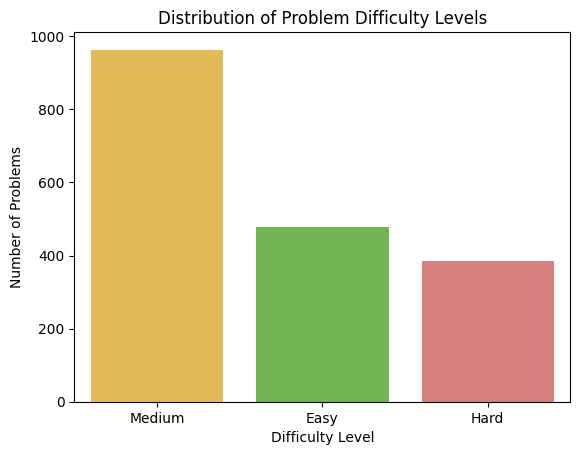

In [37]:
difficulty_distribution = data_example['difficulty'].value_counts()
difficulty_df = difficulty_distribution.reset_index()
difficulty_df.columns = ['Difficulty Level', 'Number of Problems']

difficulty_renames = {0: 'Easy', 1: 'Medium', 2: 'Hard'}
difficulty_df['Difficulty Level'] = difficulty_df['Difficulty Level'].replace(difficulty_renames)

custom_palette = {'Easy': '#6cc644', 'Medium': '#f9c440', 'Hard': '#e57373'}

sns.barplot(x='Difficulty Level', y='Number of Problems', data=difficulty_df, palette=custom_palette, hue='Difficulty Level', legend=False)
plt.title('Distribution of Problem Difficulty Levels')
plt.show()

### Distribution of Topics by Difficulty Level

Finally, we visualize how various topics are distributed across the three difficulty levels.

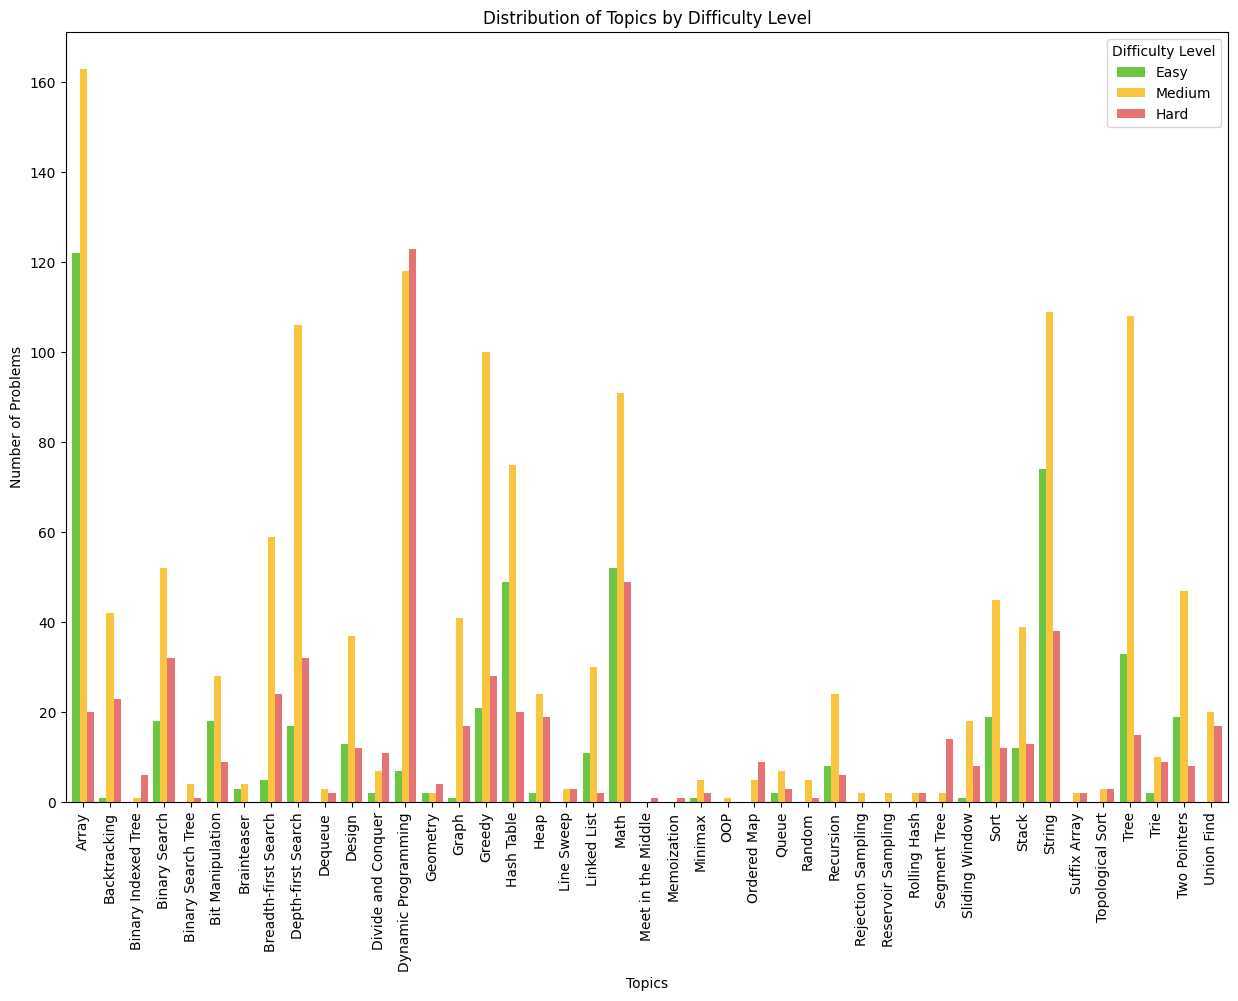

In [43]:
topic_by_difficulty = data_example.groupby('difficulty')[unique_topics].sum()
topic_by_difficulty = topic_by_difficulty.rename(index=difficulty_renames)

topic_by_difficulty.T.plot(kind='bar', figsize=(15, 10), width=0.8, color=['#6cc644', '#f9c440', '#e57373'])
plt.title('Distribution of Topics by Difficulty Level')
plt.ylabel('Number of Problems')
plt.xlabel('Topics')
plt.xticks(rotation=90)
plt.legend(title='Difficulty Level')
plt.show()

## Data Evulation and How We Preprocessing Data

### Data we need to drop

Given our goal is to predict the "difficulty" by a series of inputs, through the above data exploration and data visualization above, we can eliminate the following columns from the database:

- "id": A unique identifier for each problem, which does not aid in predicting difficulty.
- "title": Same as above.
- "description": Same as above.
- "solution_link": Same as above.
- "url": Same as above.
- "similar_questions": Same as above.
- "asked_by_faang":  This attributes just indicates whether the question was asked by faang or not. We thought it would be more useful to have “how many faang companies asked this question” instead of that for the prediction.
- "companies": Some big companies might choose harder problems, we would transfer this column to numeric attributes "fanng_count" and "non_fanng_count" that can be used by model.
- "related_topics": Although there might be a correlation between this attribute and difficulty (topics associated with obscure concepts might be harder), dealing with this attribute involves NLP.

### Data we need to standlization

We need to perform Data Transformation on the following attributes:

- "difficulty": This is our target attribute (class), given that it is initialized as "Easy", "Medium", "Hard", we need to perform Categorical Feature Encoding on it.
- "submissions": This attribute is number in string format,  we need to convert it into a number.
- "accepted": This attribute is number in string format,  we need to convert it into a number.
- "company_series" to "faang_count", As talked above, some big companies might choose harder problems, we would add a new column "faang" count how many famous companies ("Facebook", "Amazon", "Apple", "Netflix", "Google".) choosed this question.
- "company_series" to "non_faang_count", same as above, but this is how many compainess does not choose this question.

### Missing data and problems

Among the remaining attributes, we mainly have missing data in the following attributes:

- Currently, after dropping attributes, no attributes are left with missing data.

For the remaining attributes, we need to perform Normalization to make them more suitable for machine learning.


# Data Cleaning and Preprocessing (Stage One For Data Visualization)

In [32]:
data = raw_data

#Encode difficulty
data.loc[raw_data['difficulty'] == 'Easy', 'difficulty'] = 0
data.loc[raw_data['difficulty'] == 'Medium', 'difficulty'] = 1
data.loc[raw_data['difficulty'] == 'Hard', 'difficulty'] = 2
data['difficulty'] = pd.to_numeric(data.loc[:, 'difficulty'])

# Drop attribute not need
data.drop(columns=["id", "title", "description", "solution_link", "url", "asked_by_faang", "similar_questions"], inplace=True)

In [ ]:
data.head()

In [33]:
# sources: https://www.geeksforgeeks.org/python-pandas-series-str-count/
# https://saturncloud.io/blog/how-to-check-if-pandas-column-has-value-from-list-of-strings/#:~:text=One%20simple%20and%20efficient%20way,contained%20in%20the%20given%20list
# https://www.freecodecamp.org/news/dataframe-drop-column-in-pandas-how-to-remove-columns-from-dataframes/#:~:text=drop()%20Method%20in%20Pandas,the%20inplace%20parameter%20to%20True%20
import re
company_series = data["companies"]
fb_count = company_series.str.count("Facebook", re.I)
am_count = company_series.str.count("Amazon", re.I)
ap_count = company_series.str.count("Apple", re.I)
nf_count = company_series.str.count("Netflix", re.I)
gl_count = company_series.str.count("Google", re.I)

faang_count = fb_count + am_count + ap_count + nf_count + gl_count

total_company_count = company_series.str.count(",")
total_company_count = total_company_count + 1

non_faang_count = total_company_count - faang_count

data["faang_count"] = faang_count
data["non_faang_count"] = non_faang_count
data.drop(columns=["companies"], inplace=True)


In [ ]:
data.head()

In [34]:
#convert accepted and submissions to ints
def convert_to_int(s):
  if isinstance(s, (int, float)):
    return s
  elif pd.isna(s):
    return 0

  if 'K' in s:
    return float(s.replace('K', '')) * 1000
  elif 'M' in s:
    return float(s.replace('M', '')) * 1000000
  else:
    return s
data['accepted'] = data['accepted'].apply(convert_to_int)
data['submissions'] = data['submissions'].apply(convert_to_int)

related_topics = data['related_topics'].str.get_dummies(sep=",").columns.to_list()

#one hot encode related_topics
data = pd.concat([data.drop(columns=['related_topics']), data['related_topics'].str.get_dummies(sep=",")], axis=1)

In [ ]:
data

# Data Visualization and Analysis
- See the coorolation between difficulty and (acceptence rate, frequency?, submissions, topics, like to dislike)
- All data visualizations

## General (TODO NEED TO FINISH)
- How many problems are of "XYZ topic are there"
- How many easy, med hard topics are there

In [ ]:
data.describe()

is_premium   difficulty  acceptance_rate    frequency  discuss_count  \
count  1825.000000  1825.000000      1825.000000  1825.000000    1825.000000   
mean      0.218082     0.949589        53.139616    21.113041     421.435068   
std       0.413057     0.685598        14.778411    22.364741     330.583617   
min       0.000000     0.000000        13.900000     0.000000       9.000000   
25%       0.000000     0.000000        42.400000     3.100000     150.000000   
50%       0.000000     1.000000        51.600000    13.500000     292.000000   
75%       0.000000     1.000000        62.800000    31.800000     663.000000   
max       1.000000     2.000000        95.600000   100.000000     999.000000   

              likes     dislikes       rating  faang_count  non_faang_count  \
count   1825.000000  1825.000000  1825.000000  1749.000000      1749.000000   
mean    1050.534795   279.010959    77.391233     1.068039         1.250429   
std     1512.674013   608.489206    23.317515     1.011067         2.060625   
min        2.000000     0.000000     7.000000     0.000000         0.000000   
25%      217.000000    32.000000    67.000000     0.000000         0.000000   
50%      516.000000    92.000000    88.000000     1.000000         1.000000   
75%     1200.000000   239.000000    95.000000     1.000000         1.000000   
max    20217.000000  8900.000000   100.000000     4.000000        16.000000   

       ...  Sliding Window         Sort        Stack       String  \
count  ...     1825.000000  1825.000000  1825.000000  1825.000000   
mean   ...        0.014795     0.041644     0.035068     0.121096   
std    ...        0.120763     0.199829     0.184003     0.326328   
min    ...        0.000000     0.000000     0.000000     0.000000   
25%    ...        0.000000     0.000000     0.000000     0.000000   
50%    ...        0.000000     0.000000     0.000000     0.000000   
75%    ...        0.000000     0.000000     0.000000     0.000000   
max    ...        1.000000     1.000000     1.000000     1.000000   

       Suffix Array  Topological Sort         Tree         Trie  Two Pointers  \
count   1825.000000       1825.000000  1825.000000  1825.000000   1825.000000   
mean       0.002192          0.003288     0.085479     0.011507      0.040548   
std        0.046778          0.057260     0.279670     0.106680      0.197295   
min        0.000000          0.000000     0.000000     0.000000      0.000000   
25%        0.000000          0.000000     0.000000     0.000000      0.000000   
50%        0.000000          0.000000     0.000000     0.000000      0.000000   
75%        0.000000          0.000000     0.000000     0.000000      0.000000   
max        1.000000          1.000000     1.000000     1.000000      1.000000   

        Union Find  
count  1825.000000  
mean      0.020274  
std       0.140975  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 53 columns]

## Pairplot
We have opted to remove the one hot encoded data in our pairplot as it takes much to long to load if we do.

/Users/davidchoi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


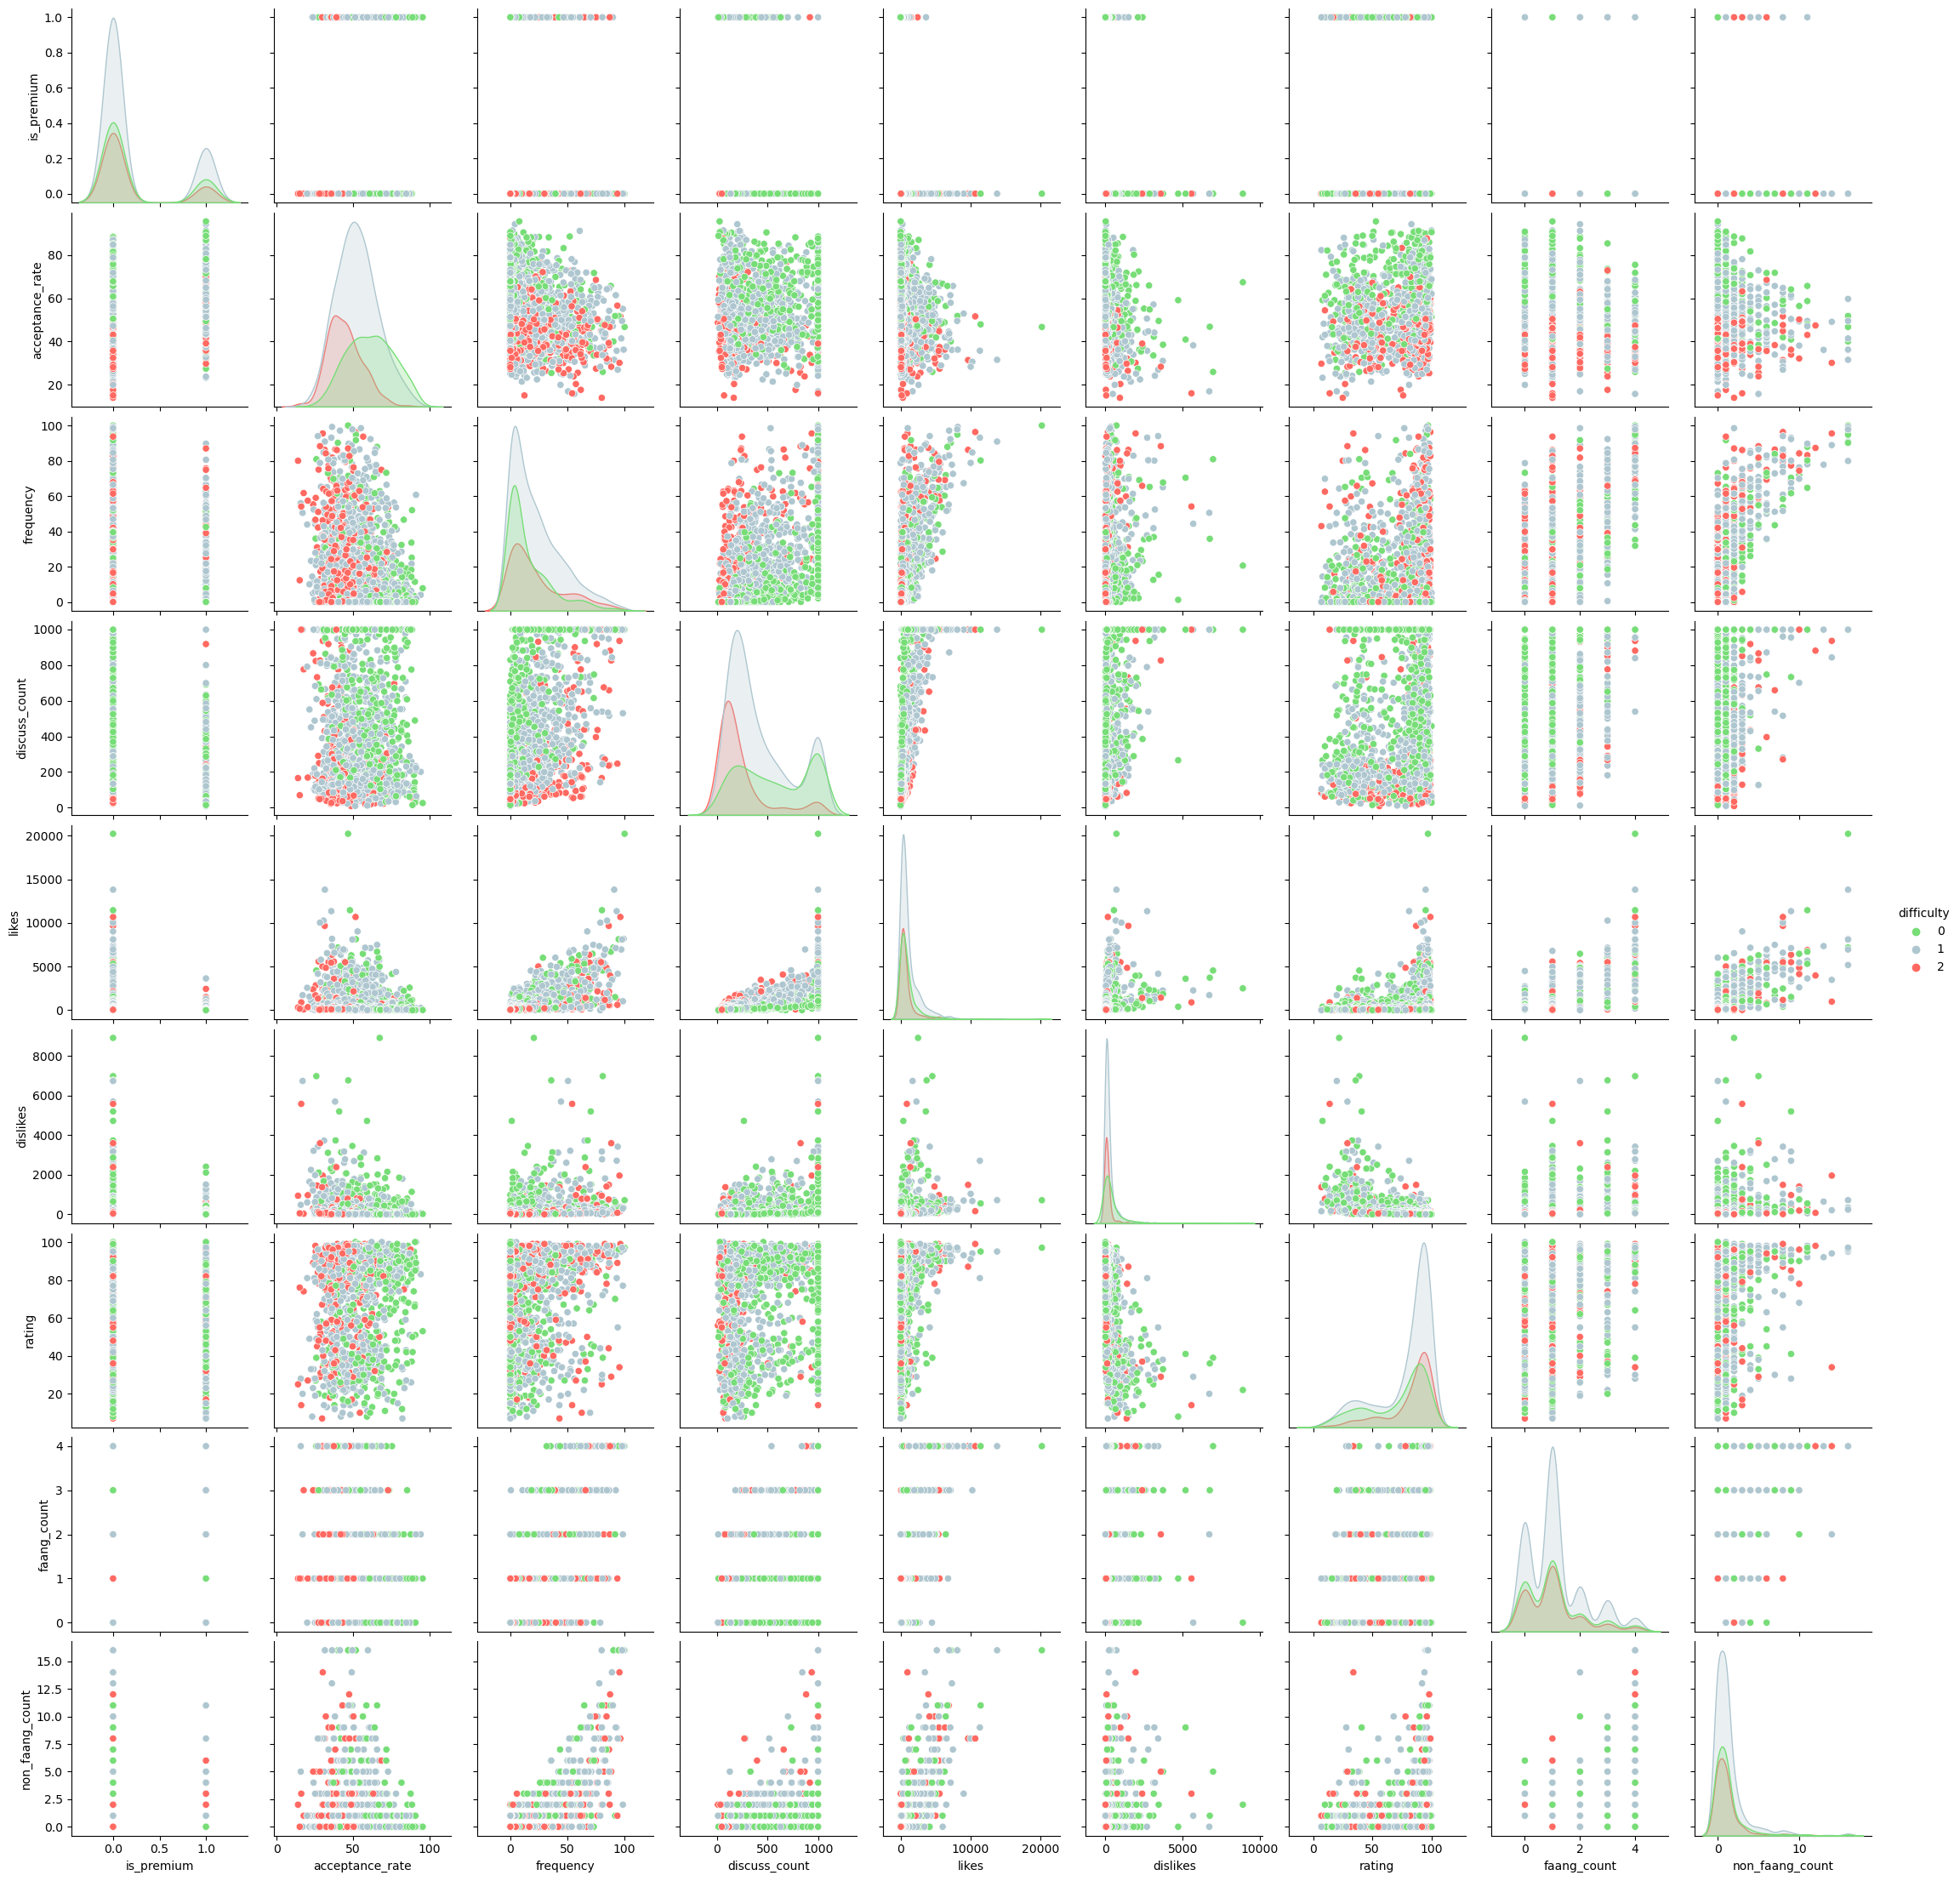

In [ ]:
#TODO plot the data with the one hot encoding
#with our pair plot we exclude the one hot encoding as it takes the pairplot forever to plot
palette = ['#77dd77', '#aec6cf', '#ff6961']
sns.pairplot(data.drop(related_topics, axis=1), hue='difficulty', palette=palette)

Some interesting things to note from our pair plot include:
- That discussion and acceptence rate seem most corrolated with difficulty.
- Likes and dislikes are inversely coorolated.
- non-faang count and frequency look to be positively corrolated.

But our pairplot isn't giving us a ton of stuff relevant information for our goal. So thats why we move on to our heat map/corrolation matrix.

## Coorrolation Matrix
We now move onto our corrolation matrix, which we hope will give us a little more insight into our data. We need to start by normalizing our data. We use minmax normalization since only some of our data looks to be normally distributed.

In [ ]:
#note we need to fix 'accepted' and 'submissions' as they are strings rn
normalized_data = data
def minMaxNormalizeSeries(series):
  if series.dtype != object:
    min = series.min()
    max = series.max()
    series = (series-min)/(max-min)
  return series
normalized_data.apply(minMaxNormalizeSeries, axis = 0)

is_premium  difficulty  acceptance_rate  frequency  discuss_count  \
0            0.0         0.0         0.401469      1.000       1.000000   
1            0.0         0.5         0.266830      0.931       1.000000   
2            0.0         0.5         0.215422      0.909       1.000000   
3            0.0         1.0         0.214198      0.862       1.000000   
4            0.0         0.5         0.204406      0.847       1.000000   
...          ...         ...              ...        ...            ...   
1820         1.0         0.0         0.917993      0.000       0.006061   
1821         0.0         0.0         0.659731      0.000       0.095960   
1822         0.0         0.5         0.708690      0.000       0.127273   
1823         0.0         0.5         0.407589      0.000       0.126263   
1824         0.0         1.0         0.173807      0.000       0.039394   

       accepted submissions     likes  dislikes    rating  ...  \
0     4100000.0   8700000.0  1.000000  0.080000  0.967742  ...   
1     1900000.0   5200000.0  0.561365  0.303820  0.795699  ...   
2     2100000.0   6700000.0  0.683057  0.080225  0.946237  ...   
3      904700.0   2900000.0  0.478011  0.166966  0.860215  ...   
4     1300000.0   4100000.0  0.507989  0.075281  0.935484  ...   
...         ...         ...       ...       ...       ...  ...   
1820        305         343  0.000000  0.000225  0.462366  ...   
1821     7900.0     11700.0  0.001731  0.000449  0.892473  ...   
1822     6800.0      9500.0  0.003908  0.000449  0.946237  ...   
1823     5000.0     10700.0  0.007173  0.000899  0.946237  ...   
1824     2100.0      7400.0  0.002473  0.004831  0.516129  ...   

      Sliding Window  Sort  Stack  String  Suffix Array  Topological Sort  \
0                0.0   0.0    0.0     0.0           0.0               0.0   
1                0.0   0.0    0.0     0.0           0.0               0.0   
2                1.0   0.0    0.0     1.0           0.0               0.0   
3                0.0   0.0    0.0     0.0           0.0               0.0   
4                0.0   0.0    0.0     1.0           0.0               0.0   
...              ...   ...    ...     ...           ...               ...   
1820             0.0   0.0    0.0     0.0           0.0               0.0   
1821             0.0   0.0    0.0     0.0           0.0               0.0   
1822             0.0   0.0    0.0     0.0           0.0               0.0   
1823             0.0   0.0    0.0     0.0           0.0               0.0   
1824             0.0   0.0    0.0     0.0           0.0               0.0   

      Tree  Trie  Two Pointers  Union Find  
0      0.0   0.0           0.0         0.0  
1      0.0   0.0           0.0         0.0  
2      0.0   0.0           1.0         0.0  
3      0.0   0.0           0.0         0.0  
4      0.0   0.0           0.0         0.0  
...    ...   ...           ...         ...  
1820   0.0   0.0           0.0         0.0  
1821   0.0   0.0           0.0         0.0  
1822   0.0   0.0           0.0         0.0  
1823   0.0   0.0           0.0         0.0  
1824   0.0   0.0           0.0         0.0  

[1825 rows x 55 columns]

We now can now look at our corrolation matrix.

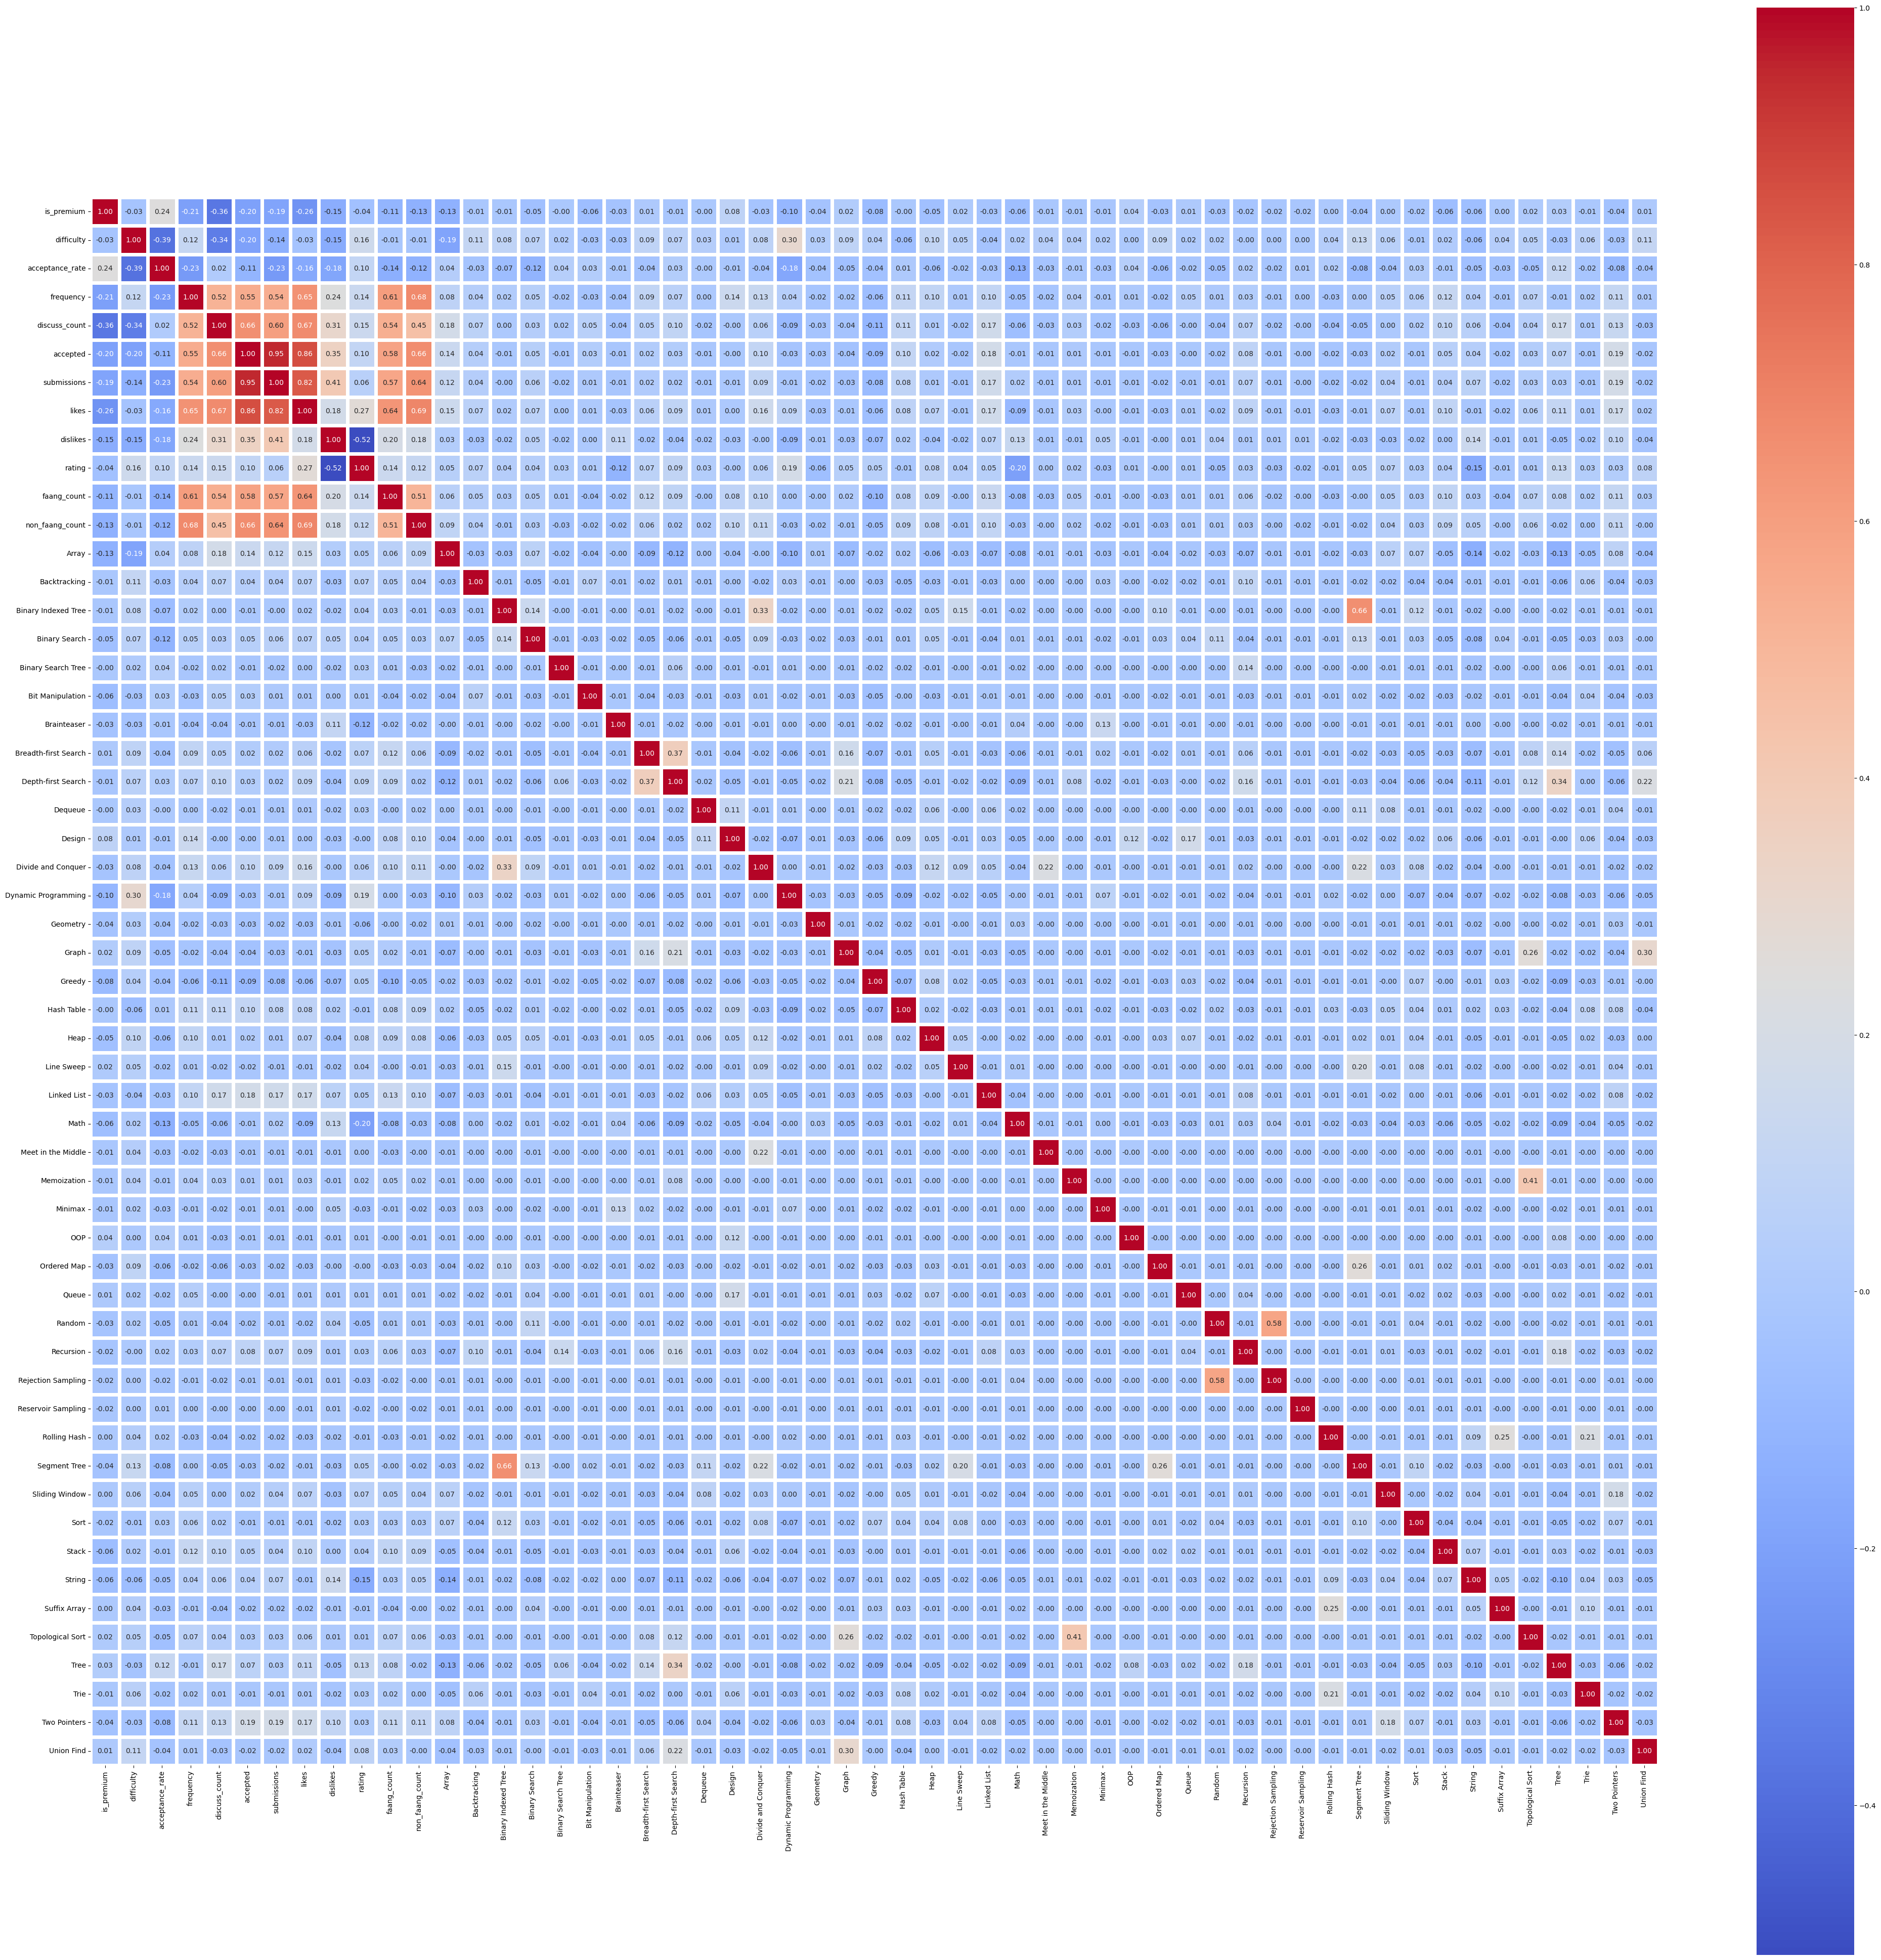

In [ ]:
#TODO remove the drop once accepted and submissions are fixed
dataplot = normalized_data

plt.figure(figsize=(50, 50))
sns.heatmap(dataplot.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5)
plt.show()

So with this corrolation matrix we can get a better understanding of what variables are correlated with others. For example:
- We can see how many of the Tree topics have positive correlation with eachother
- Discussion is negatively correlated with rating (significantly more so than submissions), implying that the harder a problem is the less discussion there will be.
- The most negatively correlated topic with rating is math XD (leetcoders hate math)

However, this corrolation matrix is a bit overwhelming. So lets focus on our parameter of interest, difficulty.

<Axes: >

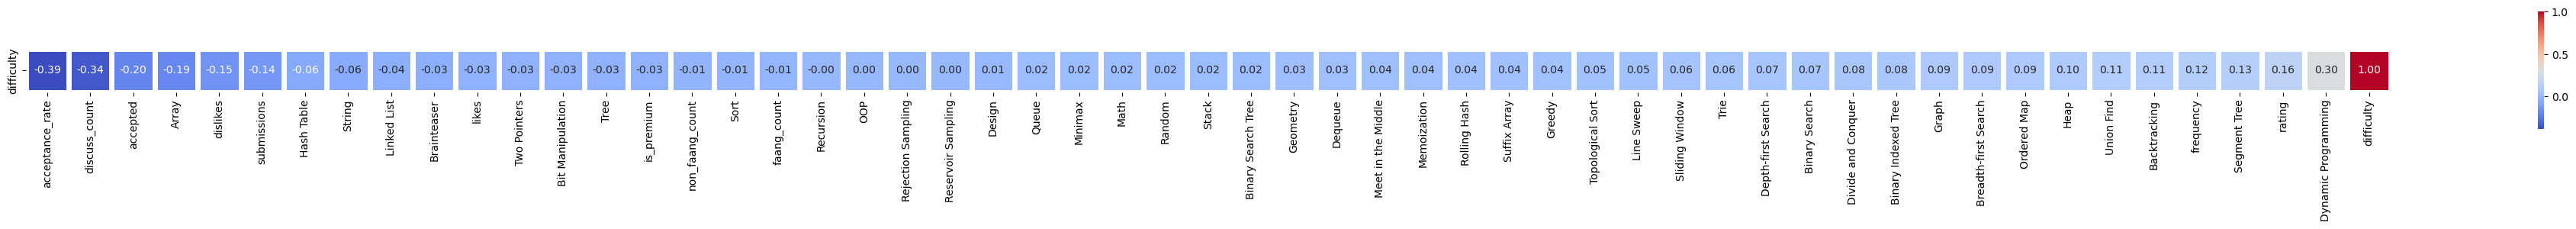

In [ ]:
#Look at all the corrolation between subjects and difficulty and rank them
difficulty_vs_all = pd.DataFrame(normalized_data.corr().loc[['difficulty'], :]).sort_values(by=['difficulty'], axis = 1)
plt.figure(figsize=(50, 2))
sns.heatmap(difficulty_vs_all, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5)

With all the topics mixed with all the other data its still a bit hard to see whats going on. So we can break it down even further into related topics and the rest of the features:

In [ ]:
difficulty_vs_related_topics = difficulty_vs_all.loc[:, related_topics].sort_values(by=['difficulty'], axis = 1)
difficulty_vs_other = difficulty_vs_all.drop(related_topics, axis=1).sort_values(by=['difficulty'], axis = 1)

Looking at the related topics we can conclude some interesting properties.
- "Dynamic programming" is the most corrolated topic in determining problem difficulty.
- Array is the most negatively corrolated topic
- Most topic labels are associated with increased difficulty

<Axes: >

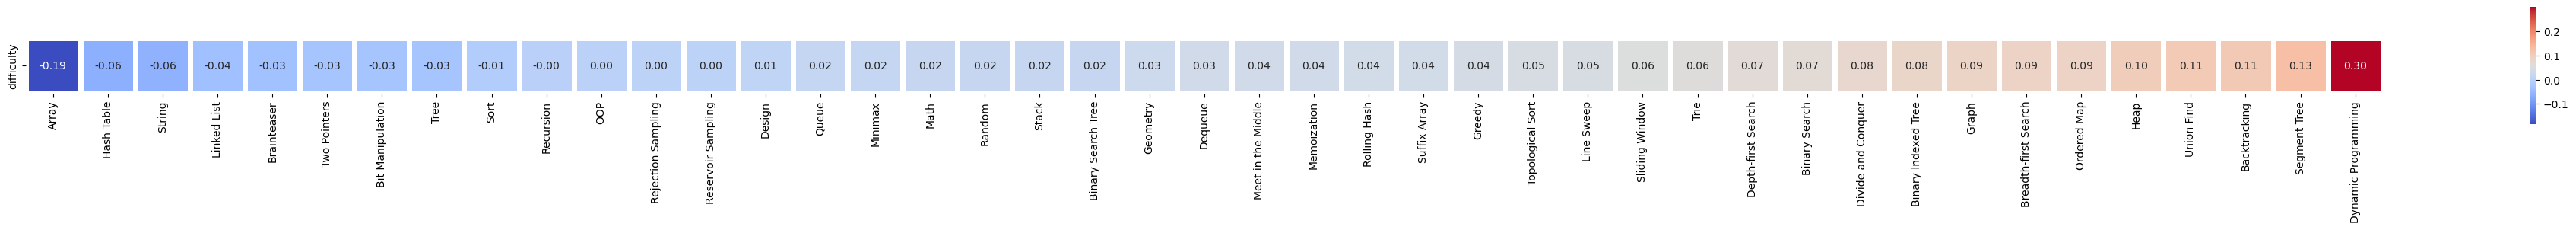

In [ ]:
plt.figure(figsize=(50, 2))
sns.heatmap(difficulty_vs_related_topics, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5)

Looking at the other features we can conclude some other interesting properties.
- "Acceptance rate" is the most corrolated feature determining difficulty (which seems self evident)
- "Discuss count" is the second most corrolated feature
- Dislikes seems to be a better predictor of problem difficulty than likes (which is interesting since leetcode actually hid the dislike counter)

<Axes: >

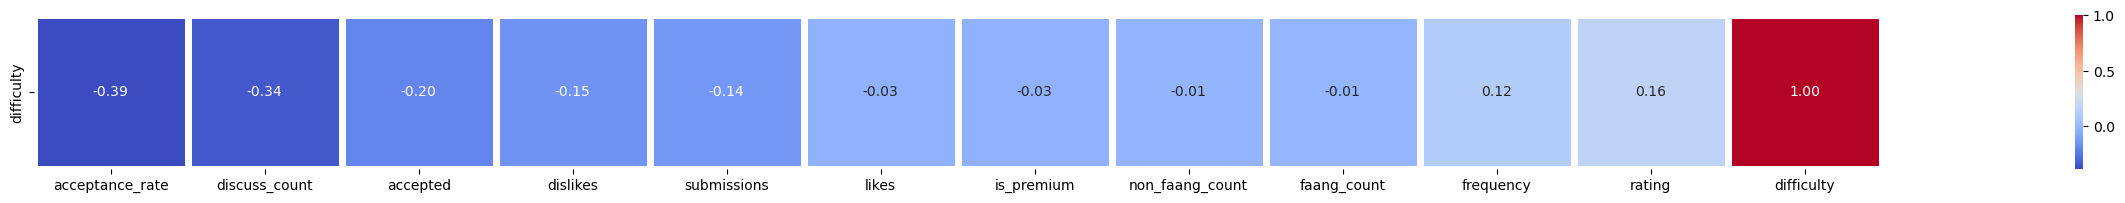

In [ ]:
plt.figure(figsize=(50, 2))
sns.heatmap(difficulty_vs_other, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5)

We can now clearly decide which features are relevant and which are not. We will drop all features who's corrolation is below .05 leaving us with 24 features (excluding difficulty).

25

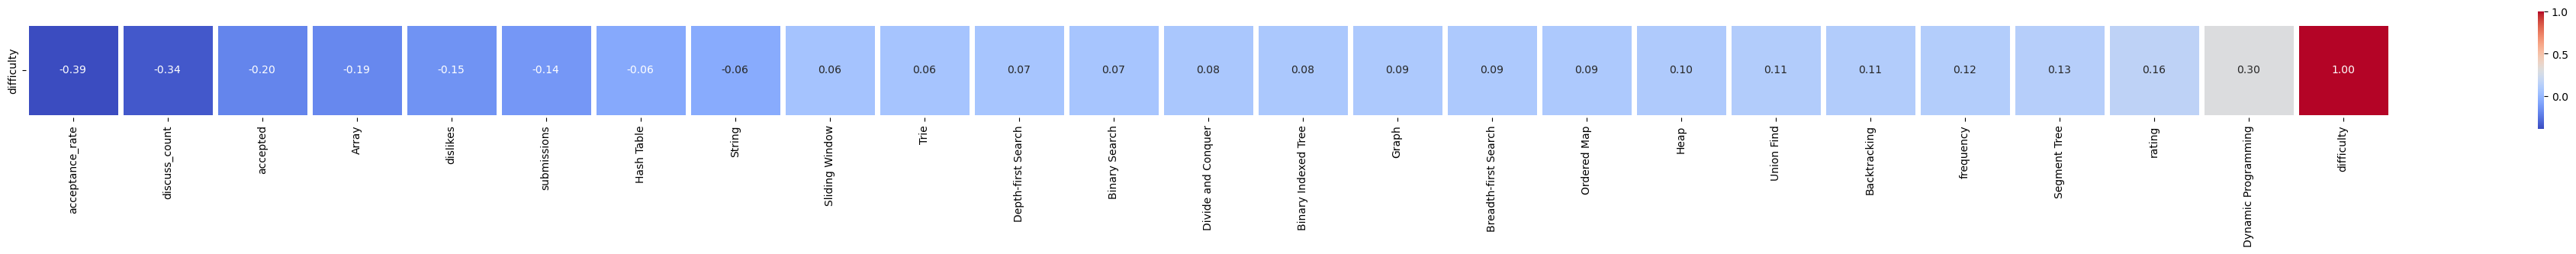

In [ ]:
#Drop values with a magnitude below .05
relevant_feature_corr = difficulty_vs_all.loc[:, (abs(difficulty_vs_all) >= .05).T.difficulty]
plt.figure(figsize=(50, 2))
sns.heatmap(relevant_feature_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5)
len(relevant_feature_corr.columns)

# Data Preprocessing (Stage Two)
With all of our data exploration done we have know have landed on a handful of features we know we want to keep.
In reality a lot of our data has already been pre-processed in the Importing and Cleanning data phase, now we just need to refine based on our finding from the data exploration.

In [ ]:
relevant_feature_corr.columns

Index(['acceptance_rate', 'discuss_count', 'accepted', 'Array', 'dislikes',
       'submissions', 'Hash Table', 'String', 'Sliding Window', 'Trie',
       'Depth-first Search', 'Binary Search', 'Divide and Conquer',
       'Binary Indexed Tree', 'Graph', 'Breadth-first Search', 'Ordered Map',
       'Heap', 'Union Find', 'Backtracking', 'frequency', 'Segment Tree',
       'rating', 'Dynamic Programming', 'difficulty'],
      dtype='object')

In [ ]:
data

is_premium  difficulty  acceptance_rate  frequency  discuss_count  \
0              0           0             46.7      100.0            999   
1              0           1             35.7       93.1            999   
2              0           1             31.5       90.9            999   
3              0           2             31.4       86.2            999   
4              0           1             30.6       84.7            999   
...          ...         ...              ...        ...            ...   
1820           1           0             88.9        0.0             15   
1821           0           0             67.8        0.0            104   
1822           0           1             71.8        0.0            135   
1823           0           1             47.2        0.0            134   
1824           0           2             28.1        0.0             48   

       accepted submissions  likes  dislikes  rating  ...  Sliding Window  \
0     4100000.0   8700000.0  20217       712      97  ...               0   
1     1900000.0   5200000.0  11350      2704      81  ...               0   
2     2100000.0   6700000.0  13810       714      95  ...               1   
3      904700.0   2900000.0   9665      1486      87  ...               0   
4     1300000.0   4100000.0  10271       670      94  ...               0   
...         ...         ...    ...       ...     ...  ...             ...   
1820        305         343      2         2      50  ...               0   
1821     7900.0     11700.0     37         4      90  ...               0   
1822     6800.0      9500.0     81         4      95  ...               0   
1823     5000.0     10700.0    147         8      95  ...               0   
1824     2100.0      7400.0     52        43      55  ...               0   

      Sort  Stack  String  Suffix Array  Topological Sort  Tree  Trie  \
0        0      0       0             0                 0     0     0   
1        0      0       0             0                 0     0     0   
2        0      0       1             0                 0     0     0   
3        0      0       0             0                 0     0     0   
4        0      0       1             0                 0     0     0   
...    ...    ...     ...           ...               ...   ...   ...   
1820     0      0       0             0                 0     0     0   
1821     0      0       0             0                 0     0     0   
1822     0      0       0             0                 0     0     0   
1823     0      0       0             0                 0     0     0   
1824     0      0       0             0                 0     0     0   

      Two Pointers  Union Find  
0                0           0  
1                0           0  
2                1           0  
3                0           0  
4                0           0  
...            ...         ...  
1820             0           0  
1821             0           0  
1822             0           0  
1823             0           0  
1824             0           0  

[1825 rows x 55 columns]

In [ ]:
#TODO clean up columns they are currently in a wack order
final_data = data.loc[:, relevant_feature_corr.columns]
final_data

acceptance_rate  discuss_count   accepted  Array  dislikes submissions  \
0                46.7            999  4100000.0      1       712   8700000.0   
1                35.7            999  1900000.0      0      2704   5200000.0   
2                31.5            999  2100000.0      0       714   6700000.0   
3                31.4            999   904700.0      1      1486   2900000.0   
4                30.6            999  1300000.0      0       670   4100000.0   
...               ...            ...        ...    ...       ...         ...   
1820             88.9             15        305      0         2         343   
1821             67.8            104     7900.0      0         4     11700.0   
1822             71.8            135     6800.0      1         4      9500.0   
1823             47.2            134     5000.0      0         8     10700.0   
1824             28.1             48     2100.0      0        43      7400.0   

      Hash Table  String  Sliding Window  Trie  ...  Breadth-first Search  \
0              1       0               0     0  ...                     0   
1              0       0               0     0  ...                     0   
2              1       1               1     0  ...                     0   
3              0       0               0     0  ...                     0   
4              0       1               0     0  ...                     0   
...          ...     ...             ...   ...  ...                   ...   
1820           0       0               0     0  ...                     0   
1821           0       0               0     0  ...                     0   
1822           0       0               0     0  ...                     0   
1823           0       0               0     0  ...                     1   
1824           0       0               0     0  ...                     0   

      Ordered Map  Heap  Union Find  Backtracking  frequency  Segment Tree  \
0               0     0           0             0      100.0             0   
1               0     0           0             0       93.1             0   
2               0     0           0             0       90.9             0   
3               0     0           0             0       86.2             0   
4               0     0           0             0       84.7             0   
...           ...   ...         ...           ...        ...           ...   
1820            0     0           0             0        0.0             0   
1821            0     0           0             0        0.0             0   
1822            0     0           0             0        0.0             0   
1823            0     0           0             0        0.0             0   
1824            0     1           0             0        0.0             0   

      rating  Dynamic Programming  difficulty  
0         97                    0           0  
1         81                    0           1  
2         95                    0           1  
3         87                    0           2  
4         94                    1           1  
...      ...                  ...         ...  
1820      50                    0           0  
1821      90                    0           0  
1822      95                    0           1  
1823      95                    1           1  
1824      55                    0           2  

[1825 rows x 25 columns]